Step 1 - Import data

In [ ]:
# Author: Ntsoumou, Manuel Davy
# License: Attribution required
# data source: https://www.baltimorepolice.org/crime-stats/open-data

In [ ]:
# Import the files module
from google.colab import files

# Use the files.upload() function to upload the CSV file from your local machine
uploaded = files.upload()


In [ ]:
# Import the pandas library
import pandas as pd

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crime-baltimore.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(544414, 23)

Step 2 - Feature Selection

In [ ]:
# create a new dataframe
df_cleaned = pd.DataFrame()

#predictor (y)
df_cleaned['Description'] = df['Description']

#features (X)
df_cleaned['District'] = df['District']
df_cleaned['CrimeDateTime'] = df['CrimeDateTime'] 
df_cleaned['Inside_Outside'] = df['Inside_Outside'] 
df_cleaned['Weapon'] = df['Weapon'].fillna('no_weapon') 
df_cleaned['Gender'] = df['Gender']
df_cleaned['Race'] = df['Race']
df_cleaned['Neighborhood'] = df['Neighborhood']
df_cleaned['Latitude'] = df['Latitude']
df_cleaned['Longitude'] = df['Longitude']
df_cleaned['Age'] = df['Age']

# remove rows with empty cells
df_cleaned.dropna(inplace=True)

#re-index the dataframe
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.shape

(366451, 11)

In [ ]:
print(df_cleaned.columns)

Index(['Description', 'District', 'CrimeDateTime', 'Inside_Outside', 'Weapon',
       'Gender', 'Race', 'Neighborhood', 'Latitude', 'Longitude', 'Age'],
      dtype='object')


In [ ]:
df_cleaned.to_csv('df_cleaned.csv')

WIP

In [ ]:
df_cleaned['Description'].value_counts()

import seaborn as sns
from matplotlib import pyplot as plt

width = 15
height = 6

# https://www.hindawi.com/journals/complexity/2022/4830411/

# ---> predict violent/non-violent crimes

# rotate and change the font size of the column labels
plt.figure(figsize=(width, height))

# get the counts of each unique value in the "Description" column
counts = df['Age'].value_counts()

# sort the data by the counts in the "Description" column
data = df.sort_values('Age', key=counts.get)

# create the plot using the sorted data
plt.figure(figsize=(width, height))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.countplot(x='Age', data=data)

plt.xticks(rotation=45)



TypeError: ignored

<Figure size 1080x432 with 0 Axes>

Step 3 - Cleaning Data

Index(['Description', 'District', 'CrimeDateTime', 'Inside_Outside', 'Weapon',
       'Gender', 'Race', 'Neighborhood', 'Latitude', 'Longitude', 'Age',
       'nv_v'],
      dtype='object')

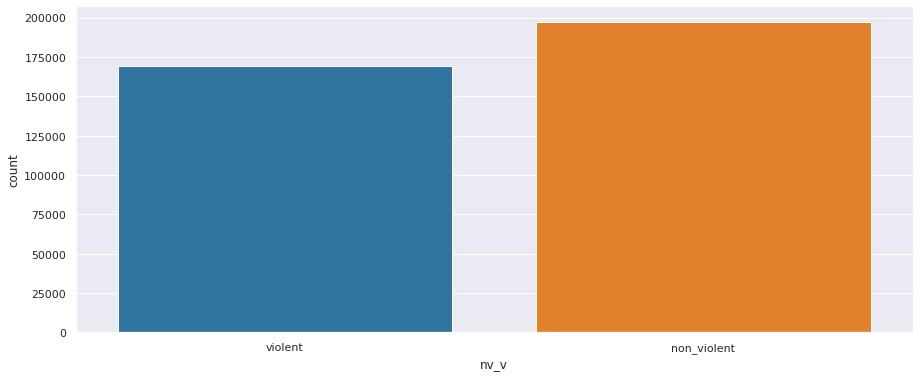

In [ ]:
#violent/non_violent

# Import the seaborn library
import seaborn as sns
import numpy as np

# Create a list of values to be checked
values = ['AGG. ASSAULT', 'ROBBERY', 'SHOOTING', 
          'COMMON ASSAULT', 'HOMICIDE', 'RAPE', 
          'ROBBERY - CARJACKING']

# Use the `isin()` method to check which rows 
# in the 'Description' column contain one of the values from the `values` list
mask = df_cleaned['Description'].isin(values)

# Use the `where()` function to create the 'nv_v' column
df_cleaned['nv_v'] = np.where(mask, 'violent', 'non_violent')


df_cleaned['nv_v'].value_counts()

# rotate and change the font size of the column labels
plt.figure(figsize=(width, height))

# Use the `set_style()` function to specify a style for the plot
sns.set_style('darkgrid')

# Use the `set_context()` function to specify a context for the plot
sns.set_context('notebook')

# Use the `countplot()` function to create a bar chart of the values in the 'nv_v' column
sns.countplot(x='nv_v', data=df_cleaned)

df_cleaned.columns

<bound method NDFrame.head of 0        2022-10-22 23:00:00+00:00
1        2022-10-22 14:44:00+00:00
2        2022-10-22 21:45:00+00:00
3        2022-10-22 23:00:00+00:00
4        2022-10-22 17:30:00+00:00
                    ...           
366445   2022-09-05 19:34:00+00:00
366446   2022-09-05 19:27:00+00:00
366447   2022-09-05 18:45:00+00:00
366448   2022-09-05 14:00:00+00:00
366449   2022-09-05 09:30:00+00:00
Name: CrimeDateTime, Length: 347744, dtype: datetime64[ns, UTC]>

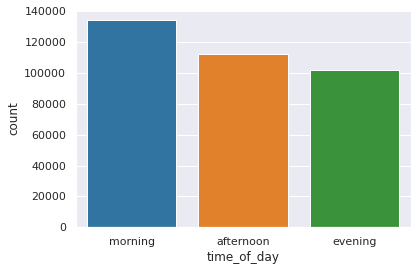

In [ ]:
# convert the column to datetime type, coerce any values that cannot be parsed to NaT
df_cleaned['CrimeDateTime'] = pd.to_datetime(df_cleaned['CrimeDateTime'], 
                                             errors='coerce')


# remove rows with NaT values from the DataFrame
df_cleaned = df_cleaned.dropna()

# convert the column to datetime type
df_cleaned['CrimeDateTime'] = pd.to_datetime(
    df_cleaned['CrimeDateTime'])

# create bins for morning, afternoon, evening, and night
bins = [0, 12, 18, 24]

# create labels for the bins
labels = ['morning', 'afternoon', 'evening']

# use pd.cut() to bin the rows into the specified time intervals
df_cleaned['time_of_day'] = pd.cut(df_cleaned['CrimeDateTime'].dt.hour, 
                                   bins=bins, labels=labels)


sns.countplot(x='time_of_day', data=df_cleaned)

df_cleaned['CrimeDateTime'].head

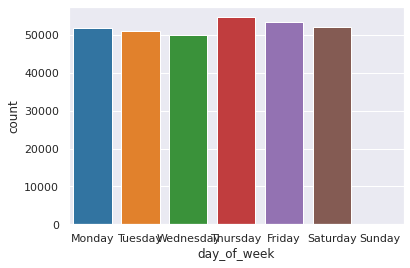

In [ ]:
# create bins for each day of the week
bins = [0, 1, 2, 3, 4, 5, 6, 7]

# create labels for the bins
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# use pd.cut() to bin the rows into the specified day of the week
df_cleaned['day_of_week'] = pd.cut(df_cleaned['CrimeDateTime'].dt.dayofweek, bins=bins, labels=labels)

sns.countplot(x='day_of_week', data=df_cleaned)


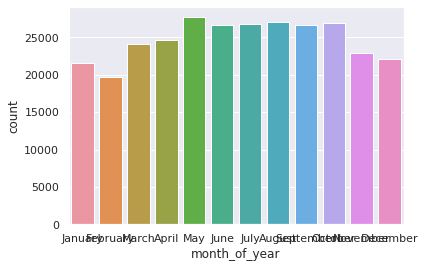

In [ ]:
# create bins for each month of the year
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# create labels for the bins
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# use pd.cut() to bin the rows into the specified month of the year
df_cleaned['month_of_year'] = pd.cut(df_cleaned['CrimeDateTime'].dt.month, bins=bins, labels=labels)

# remove all rows with at least one empty cell
df_cleaned.dropna(inplace=True)

sns.countplot(x='month_of_year', data=df_cleaned)


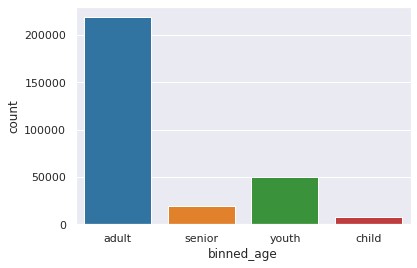

In [ ]:
# clean age

# remove negative values from age
df_cleaned['binned_age'] = df_cleaned['Age'].apply(abs)

# select rows where the 'Age' column is greater than or equal to 120 or less than 1
df_selected = df_cleaned.loc[(df_cleaned['binned_age'] >= 120) | (df_cleaned['binned_age'] < 5)]

# drop the selected rows
df_cleaned = df_cleaned.drop(df_selected.index)

df_cleaned['binned_age'].describe()

# create bins for the 'Age' column
bins = [0, 14, 24, 64, 121]
labels = ['child', 'youth', 'adult', 'senior']

# use the pandas.cut() function to create the bins
df_cleaned['binned_age'] = pd.cut(df_cleaned['binned_age'], bins, labels=labels)

# convert the 'Age_bins' column to a string data type (MIGHT BE THE PROBLEM --> SAME GOES FOR the last feature)
df_cleaned['binned_age'] = df_cleaned['binned_age'].astype(str)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

sns.countplot(x='binned_age', data=df_cleaned)


In [ ]:
# clean location

# use regex to remove all the numbers in row 'Location'
import re

df_cleaned = df_cleaned.assign(cleaned_location=df_cleaned['Location'])
df_cleaned['cleaned_location'] = df_cleaned['cleaned_location'].replace(re.compile(r'\d+'), '', regex=True)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

df_cleaned['cleaned_location'].value_counts()


 E TH ST             2722
 REISTERSTOWN RD     2544
 N CHARLES ST        2308
 BELAIR RD           2211
 EASTERN AVE         2065
                     ... 
 HUGHES ST              1
 ST JOSEPH              1
 PASCAL AV              1
RD & FLEETWOOD AV       1
 CLAYMONT               1
Name: cleaned_location, Length: 6708, dtype: int64

In [ ]:
# District is clean
df_cleaned['cleaned_district'] = df_cleaned['District']

# Weapon is clean
df_cleaned['cleaned_weapon'] = df_cleaned['Weapon']

# Race is clean
df_cleaned['cleaned_race'] = df_cleaned['Race']

# Neighborhood is clean
df_cleaned['cleaned_neighborhood'] = df_cleaned['Neighborhood']

In [ ]:
# clean longitude and latitude 

import numpy as np

# calculate the min and max values in the longitude column
lon_min = df_cleaned['Longitude'].min()
lon_max = df_cleaned['Longitude'].max()

# create evenly spaced bins for the longitude values
lon_bins = np.linspace(lon_min, lon_max, 20)

# calculate the min and max values in the latitude column
lat_min = df_cleaned['Latitude'].min()
lat_max = df_cleaned['Latitude'].max()

# create evenly spaced bins for the latitude values
lat_bins = np.linspace(lat_min, lat_max, 20)

# add the bins as new columns in the dataframe
df_cleaned['longitude_binned'] = pd.cut(df_cleaned['Longitude'], lon_bins)
df_cleaned['latitude_binned'] = pd.cut(df_cleaned['Latitude'], lat_bins)


# remove empty cells
df_cleaned = df_cleaned.dropna(subset=['longitude_binned'])
df_cleaned = df_cleaned.dropna(subset=['latitude_binned'])

#convert to strings
df_cleaned['longitude_binned'] = df_cleaned['longitude_binned'].astype(str)
df_cleaned['latitude_binned'] = df_cleaned['latitude_binned'].astype(str)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)


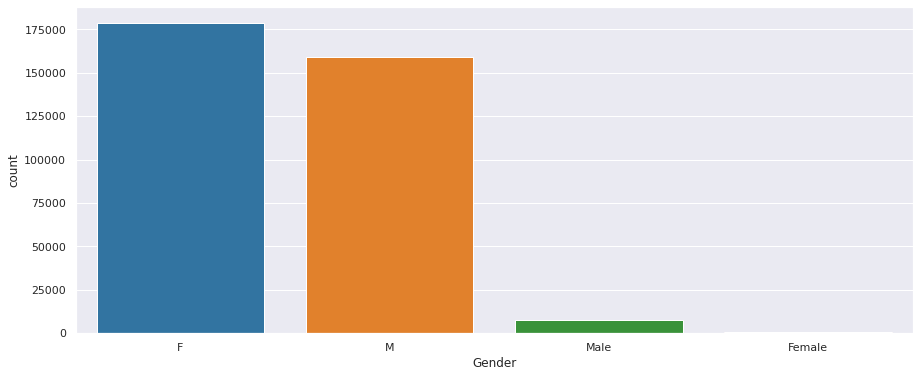

In [ ]:
# cleaning gender
mask = df_cleaned['Gender'].isin(["M", "F", "Male", "Female"])

# remove all that are not equal to "M", "F", "Male", "Female"
df_cleaned = df_cleaned.assign(cleaned_gender=df_cleaned['Gender'][mask])

# replace all F with female and all Male with M
df_cleaned['cleaned_gender'].replace({"Female": "F", "Male": "M"}, inplace=True)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

# rotate and change the font size of the column labels
plt.figure(figsize=(width, height))

sns.countplot(x='Gender', data=df_cleaned)



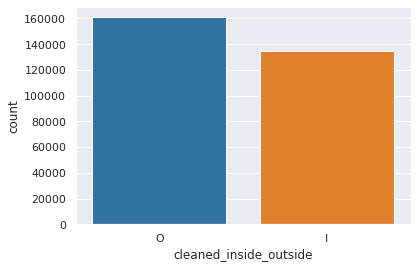

In [ ]:
# inside-outside cleaning

df_cleaned = df_cleaned.assign(cleaned_inside_outside=df_cleaned['Inside_Outside'].replace({"Inside": "I", "Outside": "O"}))

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

sns.countplot(x='cleaned_inside_outside', data=df_cleaned)


In [ ]:
# remove useless columns

df_removed = df_cleaned.drop(columns=['Description', 'CrimeDateTime', 'District', 'Inside_Outside', 'Weapon',
       'Gender', 'Race', 'Neighborhood', 'Latitude', 'Longitude', 'Age'])

# show columns in df_cleaned
print(df.columns)


# show columns in df_removed
print(df_removed.columns)

Index(['X', 'Y', 'RowID', 'CrimeDateTime', 'CrimeCode', 'Location',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'District', 'Neighborhood', 'Latitude',
       'Longitude', 'GeoLocation', 'Premise', 'VRIName', 'Total_Incidents',
       'Shape'],
      dtype='object')
Index(['nv_v', 'time_of_day', 'day_of_week', 'month_of_year', 'binned_age',
       'cleaned_district', 'cleaned_weapon', 'cleaned_race',
       'cleaned_neighborhood', 'longitude_binned', 'latitude_binned',
       'cleaned_gender', 'cleaned_inside_outside'],
      dtype='object')


Step 4 - Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# create a new dataframe
df_encoded = pd.DataFrame()

# create a LabelEncoder instance
le = LabelEncoder()

# label encoding
df_encoded['cleaned_gender'] = le.fit_transform(
    df_removed['cleaned_gender'])
df_encoded['cleaned_inside_outside'] = le.fit_transform(
    df_removed['cleaned_inside_outside'])

# create a OneHotEncoder instance
ohe = OneHotEncoder(handle_unknown='ignore')

# one hot encoding
df_encoded = ohe.fit_transform(df_removed[['time_of_day', 
                                           'binned_age', 'month_of_year', 
                                           'cleaned_district', 'cleaned_weapon',
                                           'cleaned_race', 'cleaned_neighborhood', 
                                           'longitude_binned', 'latitude_binned']])




Step 5 - Split Data

In [ ]:
# Split data

#define X
X = df_encoded

# define y
y = df_removed['nv_v']

# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) # stratify stratify=y


In [ ]:
print(X.shape, y.shape)

(295259, 372) (295259,)


Step 5 - Tune models using GridSearchCV to optimize hyperparameters

In [ ]:
# DecisionTreeClassifier --> DONE

# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree model
decisionTreeModel = DecisionTreeClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(decisionTreeModel, param_grid, cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
DecisionTreePredictions = grid_search.predict(X_test)

# output: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [ ]:
from sklearn.metrics import accuracy_score
# Use the classification_report() function to calculate the evaluation metrics for each class
decisionTreeCR = classification_report(y_test, DecisionTreePredictions)

# Print the classification_report
print(decisionTreeCR)

# Use the confusion_matrix() function to calculate the confusion matrix
decisionTreeCM = confusion_matrix(y_test, DecisionTreePredictions)

# Print the confusion_matrix
print(decisionTreeCM)

# Use the accuracy_score() function to calculate the accuracy_score
decisionTreeAccuracy = accuracy_score(y_test, DecisionTreePredictions)
# Print the confusion_matrix
print(decisionTreeAccuracy)



              precision    recall  f1-score   support

 non_violent       0.75      0.93      0.83     32014
     violent       0.89      0.64      0.74     27038

    accuracy                           0.80     59052
   macro avg       0.82      0.79      0.79     59052
weighted avg       0.82      0.80      0.79     59052

[[29912  2102]
 [ 9848 17190]]
0.7976359818465082


In [ ]:
# RandomForestClassifier --> DONE

# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7]
}

# Create a Random Forest model
randomForestModel = RandomForestClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(randomForestModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
randomForestPredictions = grid_search.predict(X_test)

# output: {'max_depth': 7, 'n_estimators': 100}

{'max_depth': 7, 'n_estimators': 100}


In [ ]:
# Use the classification_report() function to calculate the evaluation metrics for each class
randomForestCR = classification_report(y_test, randomForestPredictions)

# Print the classification_report
print(randomForestCR)

# Use the confusion_matrix() function to calculate the confusion matrix
randomForestCM = confusion_matrix(y_test, randomForestPredictions)

# Print the confusion_matrix
print(randomForestCM)

# Use the accuracy_score() function to calculate the accuracy_score
randomForestAccuracy = accuracy_score(y_test, randomForestPredictions)
# Print the confusion_matrix
print(randomForestAccuracy)


              precision    recall  f1-score   support

 non_violent       0.73      0.96      0.83     32014
     violent       0.93      0.59      0.72     27038

    accuracy                           0.79     59052
   macro avg       0.83      0.78      0.78     59052
weighted avg       0.83      0.79      0.78     59052

[[30880  1134]
 [11176 15862]]
0.7915396599607126


In [ ]:
# KNeighborsClassifier --> DONE 

from sklearn.model_selection import GridSearchCV

# Import the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}

# Create a K-Nearest Neighbors model
kNeighborsModel = KNeighborsClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(kNeighborsModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
predictions = grid_search.predict(X_test)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
kNeighborsPredictions = grid_search.predict(X_test)

# output: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

KeyboardInterrupt: ignored

In [ ]:
# Use the classification_report() function to calculate the evaluation metrics for each class
kNeighborsCR = classification_report(y_test, kNeighborsPredictions)

# Print the classification_report
print(kNeighborsCR)

# Use the confusion_matrix() function to calculate the confusion matrix
kNeighborsCM = confusion_matrix(y_test, kNeighborsPredictions)

# Print the confusion_matrix
print(kNeighborsCM)

# Use the accuracy_score() function to calculate the accuracy_score
kNeighborsAccuracy = accuracy_score(y_test, kNeighborsPredictions)
# Print the confusion_matrix
print(kNeighborsAccuracy)


In [ ]:
# GaussianNB --> keep

# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

y_train_dense = y_train.values.toarray()
X_train_dense = X_train.values.toarray()


# Import the GaussianNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import GaussianNB

# Create a list of possible values for the hyperparameters
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Create a Naive Bayes model
naiveBayesModel = GaussianNB()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(naiveBayesModel, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
naiveBayesPredictions = grid_search.predict(X_test)

In [ ]:
# Use the classification_report() function to calculate the evaluation metrics for each class
naiveBayesCR = classification_report(y_test, naiveBayesPredictions)

# Print the classification_report
print(naiveBayesCR)

# Use the confusion_matrix() function to calculate the confusion matrix
naiveBayesCM = confusion_matrix(y_test, naiveBayesPredictions)

# Print the confusion_matrix
print(naiveBayesCM)

# Use the accuracy_score() function to calculate the accuracy_score
naiveBayesAccuracy = accuracy_score(y_test, naiveBayesPredictions)
# Print the confusion_matrix
print(naiveBayesAccuracy)


In [ ]:
# MLPClassifier --> keep

# Import the MLPClassifier class from the sklearn.neural_network module
from sklearn.neural_network import MLPClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create a Multi-Layer Perceptron model
mlpClassifierModel = MLPClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(mlpClassifierModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
mlpClassifierPredictions = grid_search.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:

# Use the classification_report() function to calculate the evaluation metrics for each class
mlpClassifierCR = classification_report(y_test, mlpClassifierPredictions)

# Print the classification_report
print(mlpClassifierCR)

# Use the confusion_matrix() function to calculate the confusion matrix
mlpClassifierCM = confusion_matrix(y_test, mlpClassifierPredictions)

# Print the confusion_matrix
print(mlpClassifierCM)


Step 6 - Visualize

In [ ]:
# visualize the gender 
import matplotlib.pyplot as plt

# before cleaning
non_cleaned_counts = df['Gender'].value_counts()

non_cleaned_counts.plot(kind="bar", color="skyblue")

# get the x and y axes of the chart
ax = plt.gca()
x_axis = ax.get_xaxis()
y_axis = ax.get_yaxis()

# get the bars from the chart
bars = ax.patches

# iterate over the bars and add the counts on top of the bars
for bar in bars:
    height = bar.get_height()
    x_pos = bar.get_x()
    y_pos = bar.get_y()
    ax.text(x_pos, y_pos + height, height, ha="center", va="bottom")

# adjust the size of the plot
plt.gcf().set_size_inches(10, 5)

# set the title and labels for the axes
plt.title("Value Counts for 'cleaned_gender'")
plt.xlabel("Value")
plt.ylabel("Count")

# save the plot
plt.savefig("counts_plot.png")



Extra Algorithms

In [ ]:
#XGBClassifier

# Import the XGBClassifier class from the xgboost package
from xgboost import XGBClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create an XGBoost model
model = XGBClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
predictions = grid_search.predict(X_test)

In [ ]:
# QuadraticDiscriminantAnalysis

# Import the QuadraticDiscriminantAnalysis class from the sklearn.discriminant_analysis module
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a list of possible values for the hyperparameters
param_grid = {
    'reg_param': [0, 0.1, 1],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create a Quadratic Discriminant Analysis model
model = QuadraticDiscriminantAnalysis()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

In [ ]:
# AdaBoostClassifier --> remove

# Import the AdaBoostClassifier class from the sklearn.ensemble module
from sklearn.ensemble import AdaBoostClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an AdaBoost model
model = AdaBoostClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)


In [ ]:
# GradientBoostingClassifier --> remove

# Import the GradientBoostingClassifier class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting model
model = GradientBoostingClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)


In [ ]:
# Support Vector Machine --> remove

# Import the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# Create a list of possible values for the hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Create a SVM model
svcModel = SVC()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(svcModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)